<a href="https://colab.research.google.com/github/Tostrorog/PianoLearn/blob/main/Multivariate_Linear_Regression_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression
## Predicting House Price from Size and Number of Bedrooms

### Import Libraries

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Read Data

In [ ]:
data = np.genfromtxt('', delimiter=',')

In [3]:
!pip install -q xlrd

import pandas as pd
data = pd.read_excel('exported1.xlsx')
data

,X1(kloc),X2,effort
0,3.030,28.000,7.686
1,3.040,32.000,7.713
2,4.000,34.000,10.289
3,6.010,80.000,15.777
4,6.096,65.000,16.014
5,1.989,23.000,4.941
6,1.673,11.000,4.120
7,6.940,74.000,18.350
8,3.096,1460.000,7.862
9,5.011,605.000,13.036


In [5]:
data.shape

(34, 3)

### Normalize Data

In [4]:
data = normalize(data, axis=0)

### Seperate Data into X and Y

In [6]:
X = data[:, 0:2]
Y = data[:, 2:]

### Visualize the Data

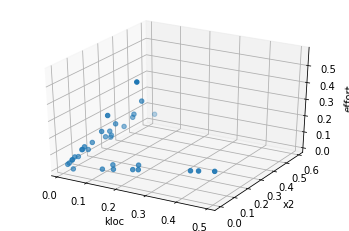

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('kloc')
ax.set_ylabel('x2')
ax.set_zlabel('effort')

plt.show()

### Hyperparameters

In [9]:
learning_rate = 0.09
max_iteration = 500

In [10]:
s_learning_rate = 0.06
s_max_iteration = 500

In [11]:

mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

### Parameters

In [12]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

### Hypothesis

In [13]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

In [14]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

In [15]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Batch Gradient Descent

In [16]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Mini-Batch Gradient Descent

In [17]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Stochastic Gradient Descent

In [18]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Train Model

In [19]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.013138281523074965
iteration :  100  loss :  0.005729698450707094
iteration :  200  loss :  0.005659126136354402
iteration :  300  loss :  0.005601781104481734
iteration :  400  loss :  0.0055551737672922


In [ ]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.00124239448086184
iteration :  100  loss :  0.0005009080256472754
iteration :  200  loss :  0.000383709633489583
iteration :  300  loss :  0.000358457717586344
iteration :  400  loss :  0.0003497048974276734


In [ ]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.006440267374919575
iteration :  100  loss :  0.001057469055029178
iteration :  200  loss :  0.0009493292161679231
iteration :  300  loss :  0.0008581038563838422
iteration :  400  loss :  0.000781114138803193


### Optimal values of Parameters using Trained Model

In [21]:
theta

array([[0.11159867],
       [0.11380209],
       [0.07153138]])

In [22]:
s_theta

array([[0.],
       [0.],
       [0.]])

In [23]:
mb_theta

array([[0.],
       [0.],
       [0.]])

### Cost vs Iteration Plots

NameError: ignored

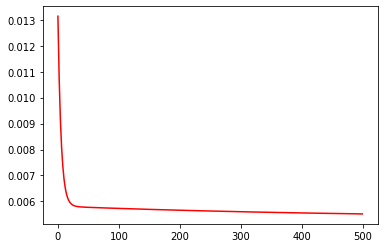

In [20]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

### Visualize the Data

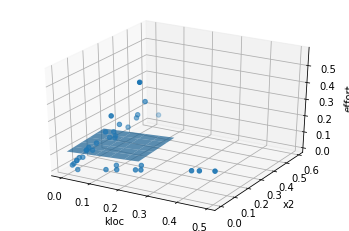

In [25]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('kloc')
ax.set_ylabel('x2')
ax.set_zlabel('effort')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
    
plt.show()

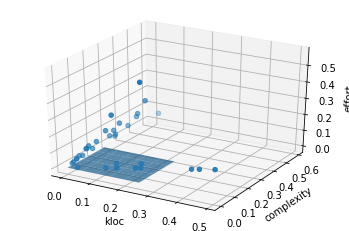

In [26]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('kloc')
ax.set_ylabel('complexity')
ax.set_zlabel('effort')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
    
plt.show()

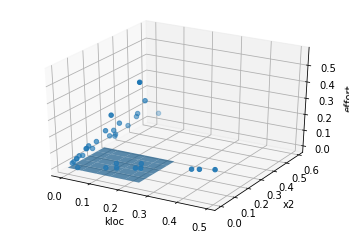

In [28]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.7)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)


ax.set_xlabel('kloc')
ax.set_ylabel('x2')
ax.set_zlabel('effort')
    
plt.show()